## Movies Score Prediction and Movie Recommendation



### **Import the required Python libraries**

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math
import seaborn as sns
import numpy as np
from matplotlib.pyplot import imread
from IPython.display import HTML

### **Import the dataset**

In [179]:
movies = pd.read_csv('Movies.csv')

## **Data Exploration & Cleaning**

In [180]:
movies.head()

,Unnamed: 0,Title,Year,Rating,Vote,Metascore,Budget,Certificate,Runtime,Genre,Overview,Artist,Director
0,0,The Shawshank Redemption,(1994),9.3,"2,751,116",82,$28.34M,R,142 min,Drama,"\nOver the course of several years, two convic...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Frank Darabont
1,1,The Dark Knight,(2008),9.0,"2,723,845",84,$534.86M,PG-13,152 min,"Action, Crime, Drama",\nWhen the menace known as the Joker wreaks ha...,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Christopher Nolan
2,2,Inception,(2010),8.8,"2,417,677",74,$292.58M,PG-13,148 min,"Action, Adventure, Sci-Fi",\nA thief who steals corporate secrets through...,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",Christopher Nolan
3,3,Fight Club,(1999),8.8,"2,190,708",66,$37.03M,R,139 min,Drama,\nAn insomniac office worker and a devil-may-c...,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...",David Fincher
4,4,Forrest Gump,(1994),8.8,"2,140,219",82,$330.25M,PG-13,142 min,"Drama, Romance","\nThe presidencies of Kennedy and Johnson, the...","['Tom Hanks', 'Robin Wright', 'Gary Sinise', '...",Robert Zemeckis


In [181]:
len(movies)

1500

### **Preprocessing**

In [182]:
movies["Year"] = movies["Year"].str.replace('(','')
movies["Year"] = movies["Year"].str.replace(')','')
movies["Genre"] = movies["Genre"].str.replace('\n','')
movies["Overview"] = movies["Overview"].str.replace('\n', '')
movies["Certificate"] = movies["Certificate"].str.replace('[', '')
movies["Certificate"] = movies["Certificate"].str.replace('<span class="certificate">', '')
movies["Certificate"] = movies["Certificate"].str.replace('</span>]', '')
movies["Vote"] = movies["Vote"].str.replace(',', '')

C:\Users\Kevin Adam Prasetya\AppData\Local\Temp\ipykernel_2388\3106929494.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies["Year"] = movies["Year"].str.replace('(','')
C:\Users\Kevin Adam Prasetya\AppData\Local\Temp\ipykernel_2388\3106929494.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies["Year"] = movies["Year"].str.replace(')','')
C:\Users\Kevin Adam Prasetya\AppData\Local\Temp\ipykernel_2388\3106929494.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies["Certificate"] = movies["Certificate"

In [183]:
movies["Genre"]=movies["Genre"].str.split(",")

In [184]:
movies["Vote"]=movies["Vote"].astype(int)

In [185]:
movies.shape

(1500, 13)

In [186]:
movies.size

19500

In [187]:
movies.index

RangeIndex(start=0, stop=1500, step=1)

In [188]:
movies.columns

Index(['Unnamed: 0', 'Title', 'Year', 'Rating', 'Vote', 'Metascore', 'Budget',
       'Certificate', 'Runtime', 'Genre', 'Overview', 'Artist', 'Director'],
      dtype='object')

In [189]:
movies.dtypes

Unnamed: 0       int64
Title           object
Year            object
Rating         float64
Vote             int32
Metascore        int64
Budget          object
Certificate     object
Runtime         object
Genre           object
Overview        object
Artist          object
Director        object
dtype: object

In [190]:
movies.head()

,Unnamed: 0,Title,Year,Rating,Vote,Metascore,Budget,Certificate,Runtime,Genre,Overview,Artist,Director
0,0,The Shawshank Redemption,1994,9.3,2751116,82,$28.34M,R,142 min,[Drama],"Over the course of several years, two convicts...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Frank Darabont
1,1,The Dark Knight,2008,9.0,2723845,84,$534.86M,PG-13,152 min,"[Action, Crime, Drama]",When the menace known as the Joker wreaks havo...,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Christopher Nolan
2,2,Inception,2010,8.8,2417677,74,$292.58M,PG-13,148 min,"[Action, Adventure, Sci-Fi]",A thief who steals corporate secrets through t...,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",Christopher Nolan
3,3,Fight Club,1999,8.8,2190708,66,$37.03M,R,139 min,[Drama],An insomniac office worker and a devil-may-car...,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...",David Fincher
4,4,Forrest Gump,1994,8.8,2140219,82,$330.25M,PG-13,142 min,"[Drama, Romance]","The presidencies of Kennedy and Johnson, the V...","['Tom Hanks', 'Robin Wright', 'Gary Sinise', '...",Robert Zemeckis


## **Working with the Genres column**

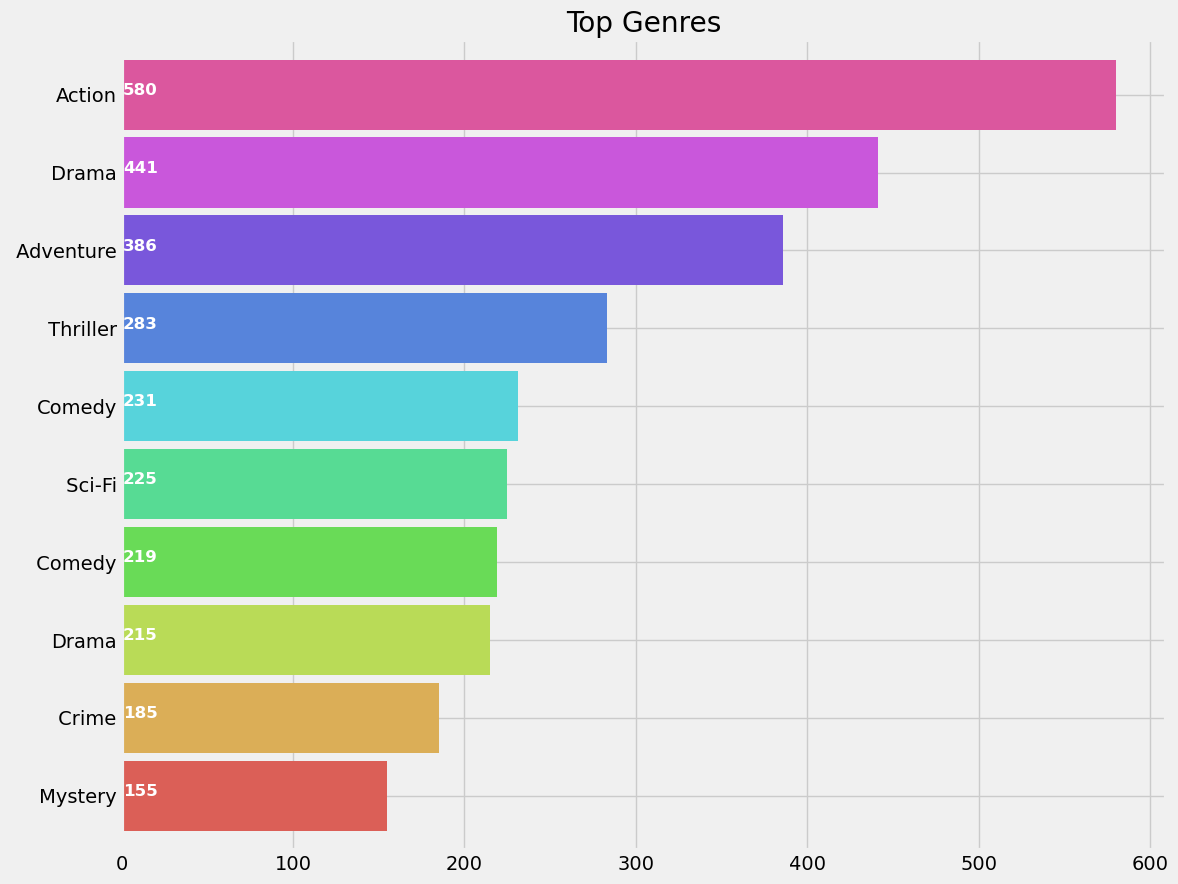

In [191]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['Genre']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [192]:
for i,j in zip(movies['Genre'],movies.index):
    list2=[]
    list2=i
    sorted(list2)
    movies.loc[j,'Genre']=str(list2)
movies['Genre'] = movies['Genre'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['Genre'] = movies['Genre'].str.split(',')

Now lets generate a list 'genreList' with all possible unique genres mentioned in the dataset.



In [193]:
genreList = []
for index, row in movies.iterrows():
    genres = row["Genre"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['Drama',
 'Action',
 'Crime',
 'Adventure',
 'Sci-Fi',
 'Romance',
 'Thriller',
 'Mystery',
 'Western',
 'War']

**One Hot Encoding for multiple labels**

In [194]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [195]:
movies['Genres_bin'] = movies['Genre'].apply(lambda x: binary(x))
movies['Genres_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: Genres_bin, dtype: object

## **Working with the Cast Column**
 

In [196]:
movies['Artist'] = movies['Artist'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['Artist'] = movies['Artist'].str.split(',')

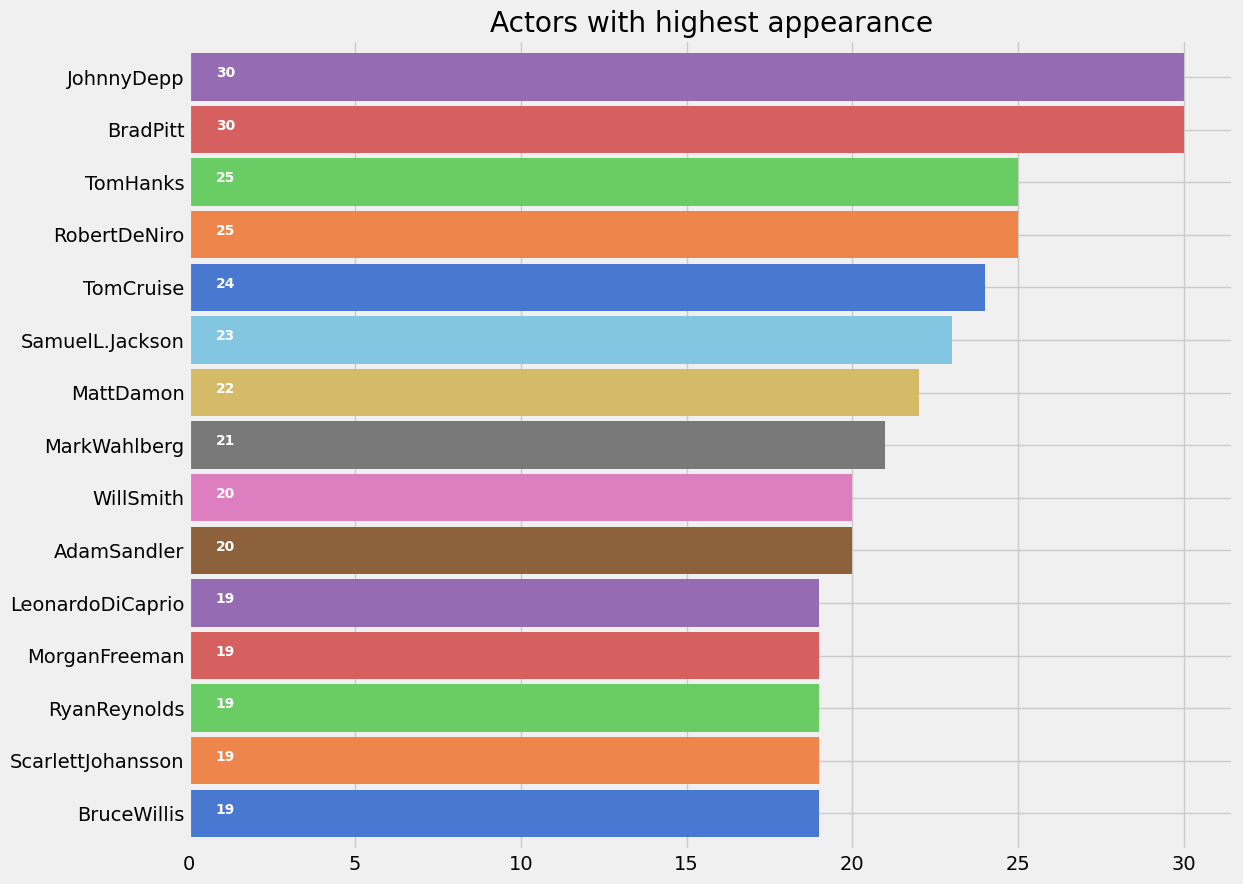

In [197]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['Artist']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

In [198]:
for i,j in zip(movies['Artist'],movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j,'Artist'] = str(list2)
movies['Artist'] = movies['Artist'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['Artist'] = movies['Artist'].str.split(',')
for i,j in zip(movies['Artist'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'Artist'] = str(list2)
movies['Artist']=movies['Artist'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [199]:
castList = []
for index, row in movies.iterrows():
    cast = row["Artist"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [200]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [201]:
movies['Artist_bin'] = movies['Artist'].apply(lambda x: binary(x))
movies['Artist_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, ...
2    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, ...
3    [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...
4    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...
Name: Artist_bin, dtype: object

## **Working with Director column**

In [202]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['Director'] = movies['Director'].apply(xstr)

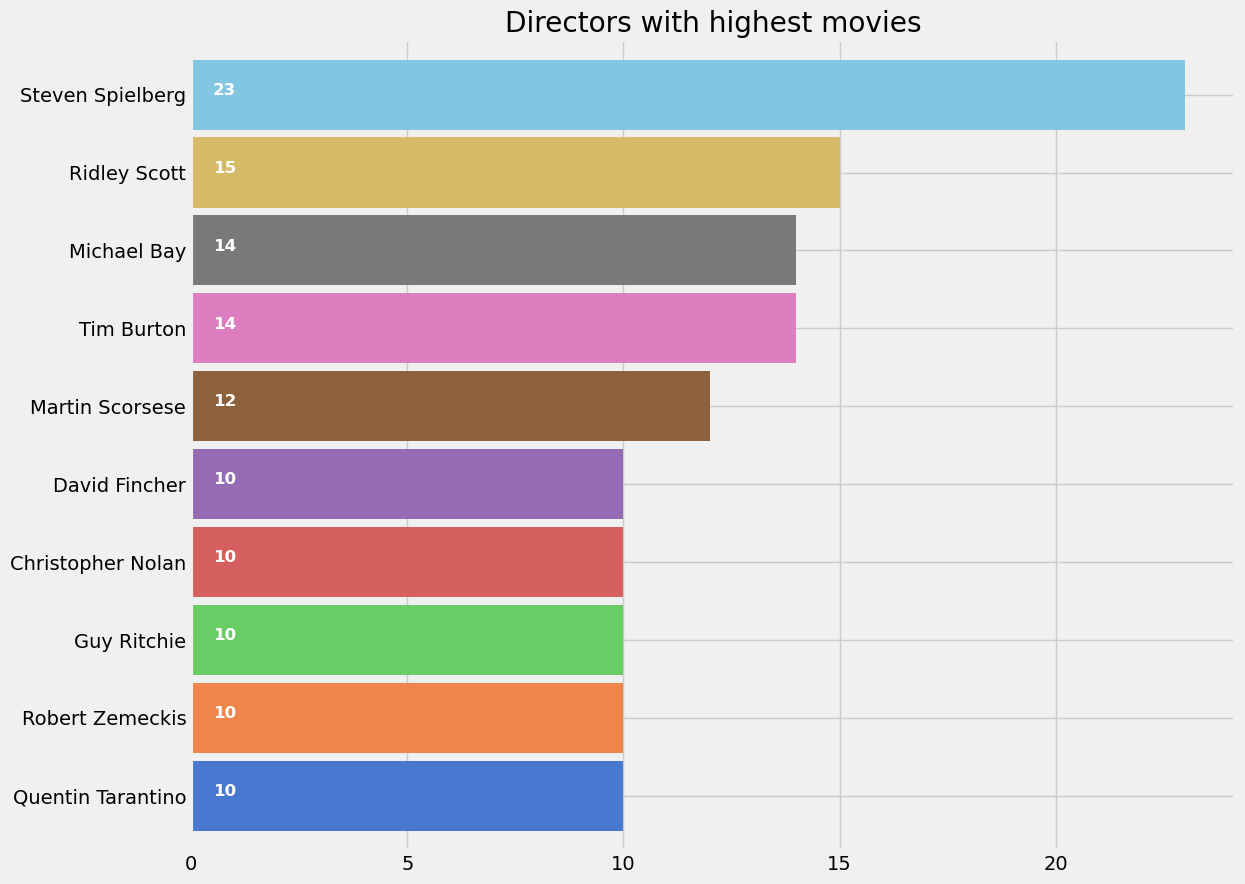

In [203]:
plt.subplots(figsize=(12,10))
ax = movies[movies['Director']!=''].Director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['Director']!=''].Director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

In [204]:
directorList=[]
for i in movies['Director']:
    if i not in directorList:
        directorList.append(i)

In [205]:
def binary(director_list):
    binaryList = []  
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [206]:
movies['Director_bin'] = movies['Director'].apply(lambda x: binary(x))
movies.head()

,Unnamed: 0,Title,Year,Rating,Vote,Metascore,Budget,Certificate,Runtime,Genre,Overview,Artist,Director,Genres_bin,Artist_bin,Director_bin
0,0,The Shawshank Redemption,1994,9.3,2751116,82,$28.34M,R,142 min,[Drama],"Over the course of several years, two convicts...","BobGunton,MorganFreeman,TimRobbins,WilliamSadler",Frank Darabont,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,The Dark Knight,2008,9.0,2723845,84,$534.86M,PG-13,152 min,"[Action, Crime, Drama]",When the menace known as the Joker wreaks havo...,"AaronEckhart,ChristianBale,HeathLedger,Michael...",Christopher Nolan,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,Inception,2010,8.8,2417677,74,$292.58M,PG-13,148 min,"[Action, Adventure, Sci-Fi]",A thief who steals corporate secrets through t...,"ElliotPage,JosephGordon-Levitt,KenWatanabe,Leo...",Christopher Nolan,"[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,Fight Club,1999,8.8,2190708,66,$37.03M,R,139 min,[Drama],An insomniac office worker and a devil-may-car...,"BradPitt,EdwardNorton,MeatLoaf,ZachGrenier",David Fincher,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,Forrest Gump,1994,8.8,2140219,82,$330.25M,PG-13,142 min,"[Drama, Romance]","The presidencies of Kennedy and Johnson, the V...","GarySinise,RobinWright,SallyField,TomHanks",Robert Zemeckis,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## **Working with the Keywords column**

In [207]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

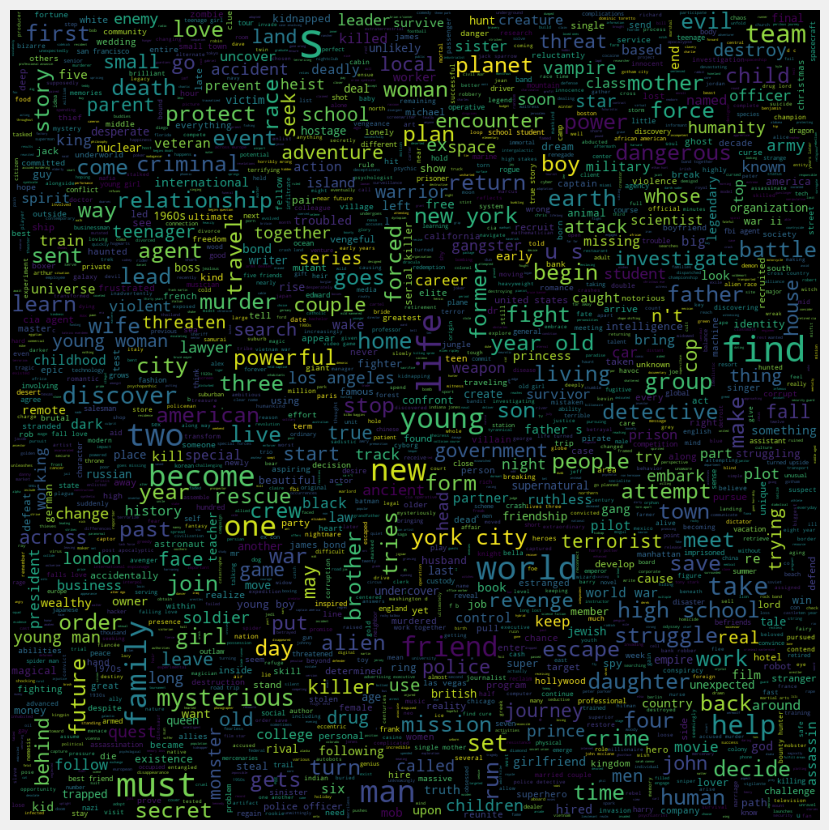

In [209]:
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=movies['Overview'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [208]:
movies['Overview'] = movies['Overview'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['Overview'] = movies['Overview'].str.split(',')
for i,j in zip(movies['Overview'],movies.index):
    list2 = []
    list2 = i
    movies.loc[j,'Overview'] = str(list2)
movies['Overview'] = movies['Overview'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['Overview'] = movies['Overview'].str.split(',')
for i,j in zip(movies['Overview'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'Overview'] = str(list2)
movies['Overview'] = movies['Overview'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['Overview'] = movies['Overview'].str.split(',')

In [209]:
words_list = []
for index, row in movies.iterrows():
    genres = row["Overview"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [210]:
def binary(words):
    binaryList = []
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [211]:
movies['Overview_bin'] = movies['Overview'].apply(lambda x: binary(x))
movies = movies[(movies['Rating']!=0)] #removing the movies with 0 score and without drector names 
movies = movies[movies['Director']!='']

## Similarity between movies

In [212]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['Genres_bin']
    genresB = b['Genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['Artist_bin']
    scoreB = b['Artist_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['Director_bin']
    directB = b['Director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['Overview_bin']
    wordsB = b['Overview_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [213]:
Similarity(3,160) #checking similarity between any 2 random movies

3.400855310484722

In [214]:
print(movies.iloc[3])
print()
print(movies.iloc[160])

Unnamed: 0                                                      3
Title                                                  Fight Club
Year                                                         1999
Rating                                                        8.8
Vote                                                      2190708
Metascore                                                      66
Budget                                                    $37.03M
Certificate                                                     R
Runtime                                                   139 min
Genre                                                     [Drama]
Overview        [Aninsomniacofficeworkerandadevil-may-caresoap...
Artist                 BradPitt,EdwardNorton,MeatLoaf,ZachGrenier
Director                                            David Fincher
Genres_bin      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Artist_bin      [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...
Director_b

In [215]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['Title','Genre','Rating','Genres_bin','Artist_bin','new_id','Director','Director_bin','Overview_bin']]
movies.head()

,Title,Genre,Rating,Genres_bin,Artist_bin,new_id,Director,Director_bin,Overview_bin
0,The Shawshank Redemption,[Drama],9.3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,Frank Darabont,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,The Dark Knight,"[Action, Crime, Drama]",9.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, ...",1,Christopher Nolan,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Inception,"[Action, Adventure, Sci-Fi]",8.8,"[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, ...",2,Christopher Nolan,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."
3,Fight Club,[Drama],8.8,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...",3,David Fincher,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,Forrest Gump,"[Drama, Romance]",8.8,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...",4,Robert Zemeckis,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ..."


## **Score Predictor**

In [216]:
import operator

def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = movies[movies['Title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.Title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['Title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['Title'].values[0],new_movie['Rating']))

In [217]:
predict_score('Inception')

Selected Movie:  Inception



Recommended Movies: 

Tenet | Genres: 'Action','Sci-Fi','Thriller' | Rating: 7.3
Interstellar | Genres: 'Adventure','Drama','Sci-Fi' | Rating: 8.7
Batman Begins | Genres: 'Action','Crime','Drama' | Rating: 8.2
The Dark Knight | Genres: 'Action','Crime','Drama' | Rating: 9.0
The Dark Knight Rises | Genres: 'Action','Drama','Thriller' | Rating: 8.4
The Prestige | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 8.5
Dunkirk | Genres: 'Action','Drama','History' | Rating: 7.8
Memento | Genres: 'Mystery','Thriller' | Rating: 8.4
Insomnia | Genres: 'Drama','Mystery','Thriller' | Rating: 7.2
Black Widow | Genres: 'Action','Adventure','Sci-Fi' | Rating: 6.7


The predicted rating for Inception is: 8.020000
The actual rating for Inception is 8.800000


In [218]:
predict_score('Donnie Darko')

Selected Movie:  Donnie Darko

Recommended Movies: 

The Prestige | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 8.5
Arrival | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 7.9
Cloud Atlas | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 7.4
Signs | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 6.8
Contact | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 7.5
Moon | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 7.8
K-PAX | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 7.4
Unbreakable | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 7.3
Brazil | Genres: 'Drama','Sci-Fi' | Rating: 7.9
The Father | Genres: 'Drama','Mystery' | Rating: 8.2


The predicted rating for Donnie Darko is: 7.670000
The actual rating for Donnie Darko is 8.000000


In [219]:
predict_score('Zodiac')

Selected Movie:  Zodiac

Recommended Movies: 

The Girl with the Dragon Tattoo | Genres: 'Crime','Drama','Mystery' | Rating: 7.8
Se7en | Genres: 'Crime','Drama','Mystery' | Rating: 8.6
Gone Girl | Genres: 'Drama','Mystery','Thriller' | Rating: 8.1
The Game | Genres: 'Drama','Mystery','Thriller' | Rating: 7.7
The Social Network | Genres: 'Biography','Drama' | Rating: 7.8
Panic Room | Genres: 'Crime','Drama','Thriller' | Rating: 6.8
Fight Club | Genres: 'Drama' | Rating: 8.8
The Curious Case of Benjamin Button | Genres: 'Drama','Fantasy','Romance' | Rating: 7.8
Alien³ | Genres: 'Action','Horror','Sci-Fi' | Rating: 6.4
Primal Fear | Genres: 'Crime','Drama','Mystery' | Rating: 7.7


The predicted rating for Zodiac is: 7.750000
The actual rating for Zodiac is 7.700000


In [220]:
predict_score('Batman')

Selected Movie:  Batman Begins

Recommended Movies: 

The Dark Knight | Genres: 'Action','Crime','Drama' | Rating: 9.0
Dunkirk | Genres: 'Action','Drama','History' | Rating: 7.8
The Dark Knight Rises | Genres: 'Action','Drama','Thriller' | Rating: 8.4
The Prestige | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 8.5
Inception | Genres: 'Action','Adventure','Sci-Fi' | Rating: 8.8
Insomnia | Genres: 'Drama','Mystery','Thriller' | Rating: 7.2
Tenet | Genres: 'Action','Sci-Fi','Thriller' | Rating: 7.3
Interstellar | Genres: 'Adventure','Drama','Sci-Fi' | Rating: 8.7
Memento | Genres: 'Mystery','Thriller' | Rating: 8.4
The Next Three Days | Genres: 'Action','Crime','Drama' | Rating: 7.3


The predicted rating for Batman Begins is: 8.140000
The actual rating for Batman Begins is 8.200000


In [221]:
#predict_score()

### Using Demographic Filtering ###

In [222]:
movies = pd.read_csv('Movies.csv')

In [223]:
movies

,Unnamed: 0,Title,Year,Rating,Vote,Metascore,Budget,Certificate,Runtime,Genre,Overview,Artist,Director
0,0,The Shawshank Redemption,(1994),9.3,"2,751,116",82,$28.34M,R,142 min,Drama,"\nOver the course of several years, two convic...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Frank Darabont
1,1,The Dark Knight,(2008),9.0,"2,723,845",84,$534.86M,PG-13,152 min,"Action, Crime, Drama",\nWhen the menace known as the Joker wreaks ha...,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Christopher Nolan
2,2,Inception,(2010),8.8,"2,417,677",74,$292.58M,PG-13,148 min,"Action, Adventure, Sci-Fi",\nA thief who steals corporate secrets through...,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",Christopher Nolan
3,3,Fight Club,(1999),8.8,"2,190,708",66,$37.03M,R,139 min,Drama,\nAn insomniac office worker and a devil-may-c...,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...",David Fincher
4,4,Forrest Gump,(1994),8.8,"2,140,219",82,$330.25M,PG-13,142 min,"Drama, Romance","\nThe presidencies of Kennedy and Johnson, the...","['Tom Hanks', 'Robin Wright', 'Gary Sinise', '...",Robert Zemeckis
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,"Good Morning, Vietnam",(1987),7.3,"146,946",67,$123.92M,R,121 min,"Biography, Comedy, Drama","\nIn 1965, an unorthodox and irreverent DJ nam...","['Robin Williams', 'Forest Whitaker', 'Tom. T....",Barry Levinson
1496,1496,Big Trouble in Little China,(1986),7.2,"146,835",53,$11.10M,PG-13,99 min,"Action, Adventure, Comedy",\nA rough-and-tumble trucker and his side kick...,"['Kurt Russell', 'Kim Cattrall', 'Dennis Dun',...",John Carpenter
1497,1497,CODA,(2021),8.0,"146,794",72,-,PG-13,111 min,"Comedy, Drama, Music",\nAs a CODA (Child of Deaf Adults) Ruby is the...,"['Emilia Jones', 'Marlee Matlin', 'Troy Kotsur...",Sian Heder
1498,1498,Boyz n the Hood,(1991),7.8,"146,730",76,$57.50M,R,112 min,"Crime, Drama",\nFollows the lives of three young males livin...,"['Cuba Gooding Jr.', 'Laurence Fishburne', 'Hu...",John Singleton


In [224]:
movies["Year"] = movies["Year"].str.replace('(','')
movies["Year"] = movies["Year"].str.replace(')','')
movies["Genre"] = movies["Genre"].str.replace('\n','')
movies["Overview"] = movies["Overview"].str.replace('\n', '')
movies["Certificate"] = movies["Certificate"].str.replace('[', '')
movies["Certificate"] = movies["Certificate"].str.replace('<span class="certificate">', '')
movies["Certificate"] = movies["Certificate"].str.replace('</span>]', '')
movies["Vote"] = movies["Vote"].str.replace(',', '')
movies["Artist"] = movies["Artist"].str.replace("'", '')

C:\Users\Kevin Adam Prasetya\AppData\Local\Temp\ipykernel_2388\3349841792.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies["Year"] = movies["Year"].str.replace('(','')
C:\Users\Kevin Adam Prasetya\AppData\Local\Temp\ipykernel_2388\3349841792.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies["Year"] = movies["Year"].str.replace(')','')
C:\Users\Kevin Adam Prasetya\AppData\Local\Temp\ipykernel_2388\3349841792.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies["Certificate"] = movies["Certificate"

In [225]:
movies['Vote'] = movies['Vote'].astype(int)

In [226]:
C= movies['Rating'].mean()
C

7.172866666666674

In [227]:
m= movies['Vote'].quantile(0.9)
m

700387.6000000001

In [228]:
def weighted_rating(x, m=m, C=C):
    v = x['Vote']
    R = x['Rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [229]:
movies['Score'] = movies.apply(weighted_rating, axis=1)


In [230]:
#Sort movies based on score calculated above
movies = movies.sort_values('Score', ascending=False)

#Print the top 15 movies
movies[['Title', 'Vote', 'Rating', 'Score']].head(10)

,Title,Vote,Rating,Score
0,The Shawshank Redemption,2751116,9.3,8.868357
9,The Godfather,1913676,9.2,8.656869
1,The Dark Knight,2723845,9.0,8.626281
10,The Lord of the Rings: The Return of the King,1890201,9.0,8.506019
5,Pulp Fiction,2113442,8.9,8.470101
2,Inception,2417677,8.8,8.434509
3,Fight Club,2190708,8.8,8.405816
4,Forrest Gump,2140219,8.8,8.398810
23,Schindler's List,1387353,9.0,8.387040
7,The Lord of the Rings: The Fellowship of the Ring,1918805,8.8,8.364895


Text(0.5, 1.0, 'Popular Movies')

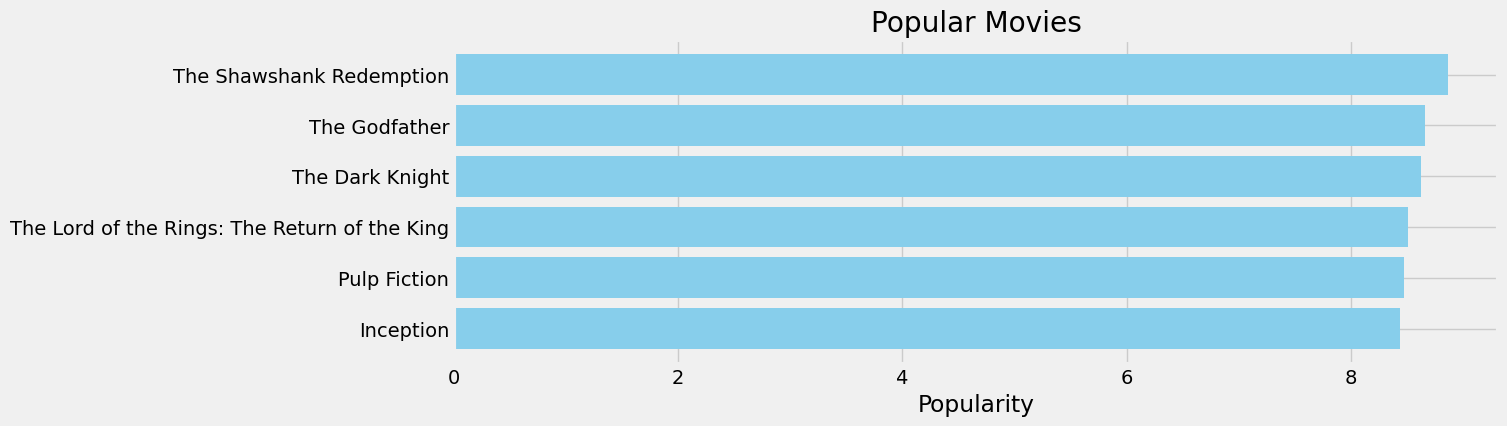

In [231]:
pop= movies.sort_values('Score', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['Title'].head(6),pop['Score'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

### Using Content Based Filtering ###

In [232]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movies['Overview'] = movies['Overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['Overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(1500, 7136)

In [233]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [234]:
indices = pd.Series(movies.index, index=movies['Title']).drop_duplicates()

In [235]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    for i in sim_scores:
        movie_indices = i[0]
        x= print(movies['Title'].iloc[movie_indices]+" | Genre: "+str(movies['Genre'].iloc[movie_indices])+" | "+str(movies['Rating'].iloc[movie_indices]))
    # Return the top 10 most similar movies
    return x

In [236]:
get_recommendations('Top Gun')

How to Train Your Dragon | Genre: Animation, Action, Adventure | 8.1
Ghost Rider | Genre: Action, Fantasy, Thriller | 5.3
Kung Fu Panda 2 | Genre: Animation, Action, Adventure | 7.2
This Means War | Genre: Action, Comedy, Romance | 6.3
Maleficent | Genre: Adventure, Family, Fantasy | 6.9
Ice Age: The Meltdown | Genre: Animation, Adventure, Comedy | 6.8
Lion | Genre: Biography, Drama | 8.0
Teenage Mutant Ninja Turtles | Genre: Action, Adventure, Comedy | 5.8
Man of Steel | Genre: Action, Adventure, Sci-Fi | 7.1
The Croods | Genre: Animation, Action, Adventure | 7.2
